# Logistic Regression is a classification model.
## Part 1 Exploration & Visualization.

In [21]:
# Imports for data handling
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

In [22]:
# Imports for visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [23]:
# Loaded our dataset.
train = pd.read_csv('train.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


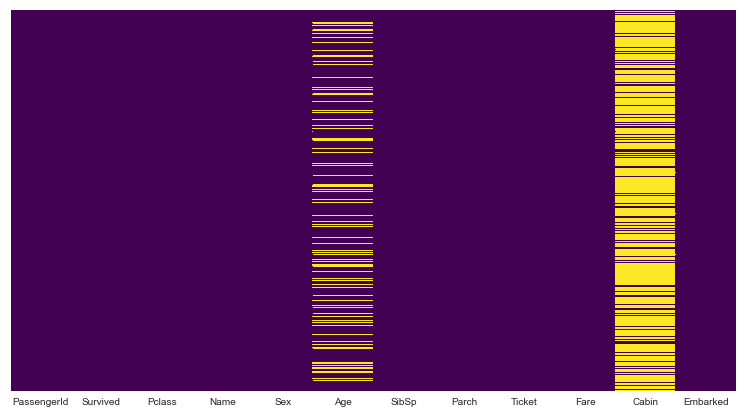

In [24]:
# Let's use boolean null detection to create a heatmap. Therefore we can see missing values from out dataset.
plt.figure(figsize=(13,7))  # Figure size.
sns.heatmap(train.isnull(),yticklabels= False, cbar = False, cmap='viridis')

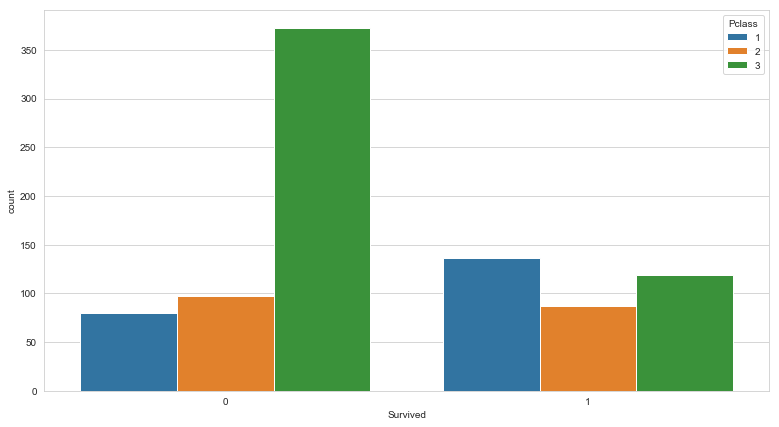

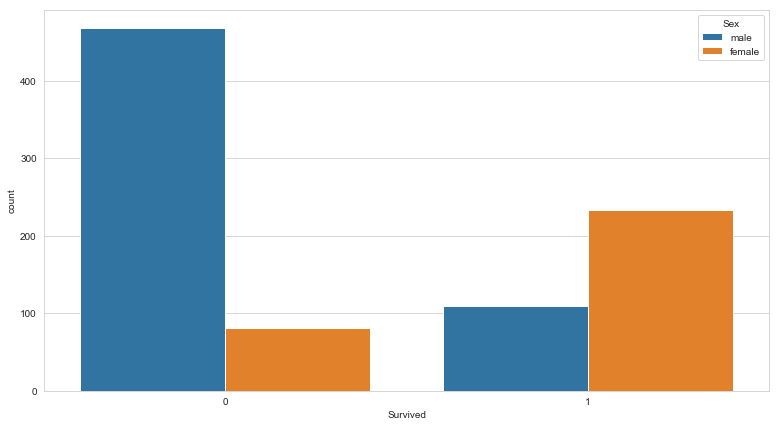

In [25]:
# Let's get insight about the survived people.

sns.set_style('whitegrid')
plt.figure(figsize=(13,7)) 
sns.countplot(x = 'Survived',hue = 'Pclass',data = train)

sns.set_style('whitegrid')
plt.figure(figsize=(13,7)) 
sns.countplot(x = 'Survived',hue = 'Sex',data = train)

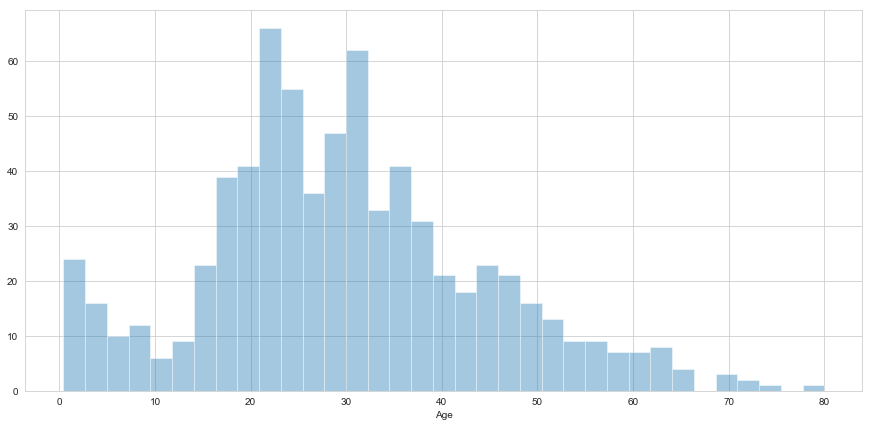

In [26]:
# Let's see the age information of people.

sns.set_style('whitegrid')
plt.figure(figsize=(15,7)) 
sns.distplot(train['Age'].dropna(),bins = 35,kde = False)

In [27]:
# To check what we can use for more insight!
# We can check siblings,Fare,Cabin and Embarkment informations later on.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


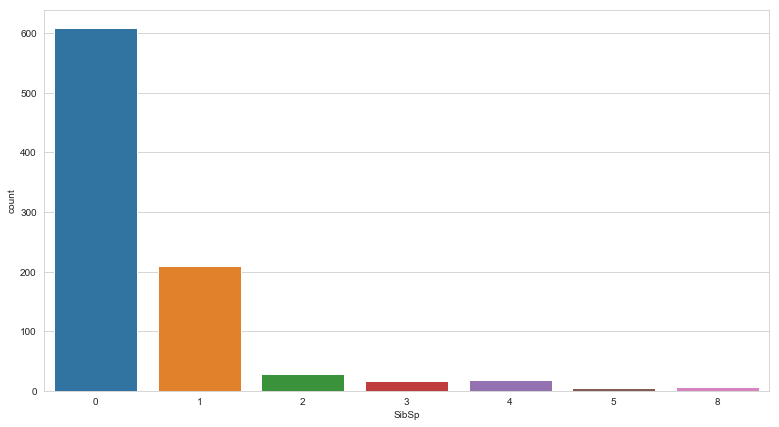

In [28]:
# We can check sibling info.
plt.figure(figsize=(13,7))
sns.countplot(x = 'SibSp',data = train)

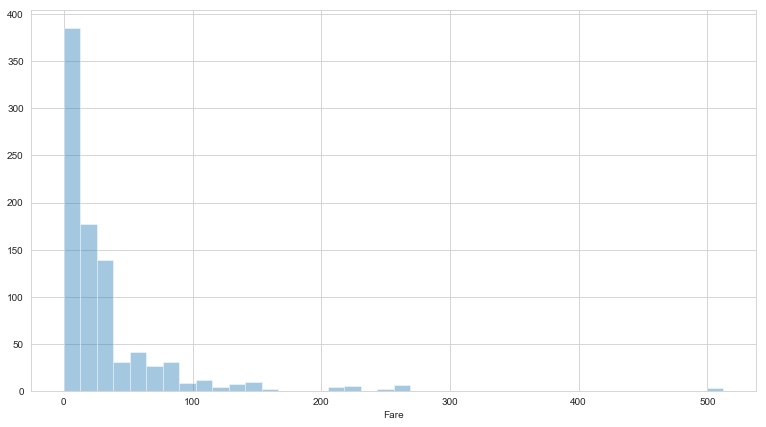

In [29]:
# Let's take a look at Fare column.
plt.figure(figsize = (13,7))
sns.distplot(train['Fare'],bins=40,kde = False)

# Second part, dealing with missing values.
## Cleaning, processing and getting data ready for ML algorithm.

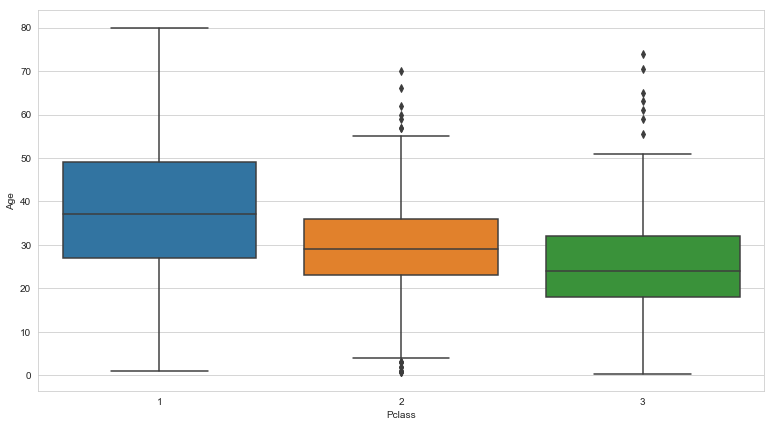

In [30]:
plt.figure(figsize=(13,7))
sns.boxplot(x='Pclass', y = 'Age', data = train)

# We can see that 1st class passengers tends to be older from this plot. So we can use this information to deal with missing values.

In [31]:
# Let's create a function using the information above to fill out missing values.
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else : 
        return Age

In [32]:
# Let's apply our function into the our database.
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis = 1)

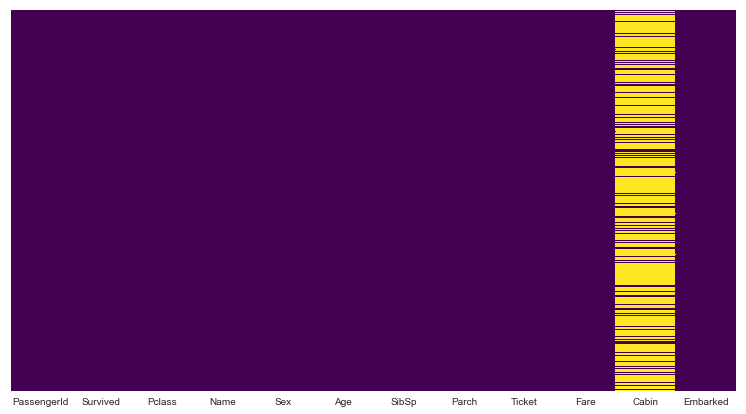

In [33]:
plt.figure(figsize = (13,7))
sns.heatmap(train.isnull(),yticklabels = False,cbar = False,cmap='viridis')

In [34]:
# Let's drop na values from cabin column.
train.drop('Cabin',axis=1,inplace = True)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [35]:
# Then let's create dummies for our categorical attributes.

sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [36]:
# Now let's concat our new dataframes.
train = pd.concat([train,sex,embark],axis = 1)
train.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [37]:
# Now we can drop Embark and Sex column
train.drop(['Sex','Embarked','Name','Ticket'],axis = 1,inplace = True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [41]:
# Also we can drop PassenverID because it's useless for ML algorithm.
train.drop('PassengerId',axis=1,inplace=True)
train.head(20)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
5,0,3,24.0,0,0,8.4583,1,1,0
6,0,1,54.0,0,0,51.8625,1,0,1
7,0,3,2.0,3,1,21.0750,1,0,1
8,1,3,27.0,0,2,11.1333,0,0,1
9,1,2,14.0,1,0,30.0708,0,0,0


In [46]:
X = train.drop('Survived',axis = 1)
y = train['Survived']

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 101)

In [48]:
# Let's fit our model to train data.
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)

C:\Users\burak\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
# Let's predict with the test dataset.

prediction = logmodel.predict(X_test)

In [52]:
# Now we can evaluete our classification.

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,prediction))
confusion_matrix(y_test,prediction)

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.78      0.65      0.71       114

   micro avg       0.77      0.77      0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



array([[133,  21],
       [ 40,  74]], dtype=int64)